# EDA Box Office Revenue

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
from imageio import imread
from matplotlib.colors import rgb_to_hsv
from datetime import datetime


In [3]:
train_raw = pd.read_csv('data/train.tsv',delimiter='\t')

In [4]:
train_raw

,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,Keywords,cast,crew
0,/7IBpOrw0ATwL1AOV97mtsceDpYs.jpg,"{'id': 556, 'name': 'Spider-Man Collection', '...",258000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",https://www.sonypictures.com/movies/spiderman3,559,tt0413300,en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,22.024,/2N9lhZg6VtVJoGCZDjXVC3a81Ea.jpg,"[{'id': 19551, 'logo_path': '/2WpWp9b108hizjHK...","[{'iso_3166_1': 'US', 'name': 'United States o...",2007-05-01,890871626,139.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The battle within.,Spider-Man 3,False,6.2,8180,"[{'id': 697, 'name': 'loss of loved one'}, {'i...","[{'cast_id': 30, 'character': 'Peter Parker / ...","[{'credit_id': '52fe4252c3a36847f80151a5', 'de..."
1,/lYeE7k0OR3HXyoq7FeswyaxFJvL.jpg,"{'id': 256296, 'name': 'Silent Night, Deadly N...",250000,"[{'id': 35, 'name': 'Comedy'}, {'id': 27, 'nam...",NaN,50719,tt0093974,en,"Silent Night, Deadly Night Part 2",After being traumatized by his brother Billy's...,4.756,/64ATtm2eMd0yfrTJsHANQ0NmMSn.jpg,"[{'id': 18924, 'logo_path': None, 'name': 'Sil...","[{'iso_3166_1': 'US', 'name': 'United States o...",1987-04-10,154323,88.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The nightmare is about to begin ... AGAIN!,"Silent Night, Deadly Night Part 2",False,4.3,68,"[{'id': 65, 'name': 'holiday'}, {'id': 1991, '...","[{'cast_id': 1000, 'character': 'Ricky Caldwel...","[{'credit_id': '52fe47d4c3a36847f814a70f', 'de..."
2,/gVXLIfMR2hLmkn0nACctlMCJBfx.jpg,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",https://www.scottymovie.com/,469062,tt2773246,en,Scotty and the Secret History of Hollywood,A deliciously scandalous portrait of unsung Ho...,4.746,/2uXDNXBoIrRBbfpVrvegoLr8OVt.jpg,"[{'id': 88564, 'logo_path': '/pn3p12IC4Tb0K8re...","[{'iso_3166_1': 'US', 'name': 'United States o...",2018-07-27,176236,98.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Scotty and the Secret History of Hollywood,False,6.5,15,"[{'id': 158718, 'name': 'lgbt'}]","[{'cast_id': 1, 'character': 'Himself', 'credi...","[{'credit_id': '5980e931c3a3680cfb002d0e', 'de..."
3,/rKjE17ncAGNzeImNWbdGTimzjtk.jpg,"{'id': 8917, 'name': 'Hellraiser Collection', ...",1000000,"[{'id': 27, 'name': 'Horror'}]",NaN,9003,tt0093177,en,Hellraiser,An unfaithful wife encounters the zombie of he...,13.828,/4nfAhOTlfZUHNorHJXEib7GYFpp.jpg,"[{'id': 1950, 'logo_path': None, 'name': 'New ...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",1987-09-11,14564027,94.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,He'll tear your soul apart.,Hellraiser,False,6.9,1115,"[{'id': 1449, 'name': 'underworld'}, {'id': 31...","[{'cast_id': 15, 'character': 'Larry Cotton', ...","[{'credit_id': '533fd9260e0a262b92001027', 'de..."
4,/zcJxJVhvxNHJJ2J7Q7NhgO9nPUV.jpg,"{'id': 108693, 'name': ""National Lampoon's Vac...",15000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 12, 'nam...",NaN,11153,tt0085995,en,National Lampoon's Vacation,Clark Griswold is on a quest to take his famil...,15.070,/ySI88wO1IFyKGWpSKRTSPilE3t2.jpg,"[{'id': 174, 'logo_path': '/IuAlhI9eVC9Z8UQWOI...","[{'iso_3166_1': 'US', 'name': 'United States o...",1983-07-28,61399552,99.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Every summer Chevy Chase takes his family on a...,National Lampoon's Vacation,False,7.1,782,"[{'id': 5493, 'name': 'relatives'}, {'id': 731...","[{'cast_id': 1, 'character': 'Clark Griswold',...","[{'credit_id': '52fe44039251416c75025f27', 'de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5210,NaN,"{'id': 239968, 'name': 'La cage aux folles Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,78159,tt0088873,fr,"La cage aux folles III - ""Elles"" se marien

In [22]:
train_raw.production_companies[0]

"[{'id': 19551, 'logo_path': '/2WpWp9b108hizjHKdA107hFmvQ5.png', 'name': 'Marvel Enterprises', 'origin_country': 'US'}, {'id': 5, 'logo_path': '/71BqEFAF4V3qjjMPCpLuyJFB9A.png', 'name': 'Columbia Pictures', 'origin_country': 'US'}, {'id': 326, 'logo_path': None, 'name': 'Laura Ziskin Productions', 'origin_country': ''}, {'id': 34, 'logo_path': '/GagSvqWlyPdkFHMfQ3pNq6ix9P.png', 'name': 'Sony Pictures', 'origin_country': 'US'}]"

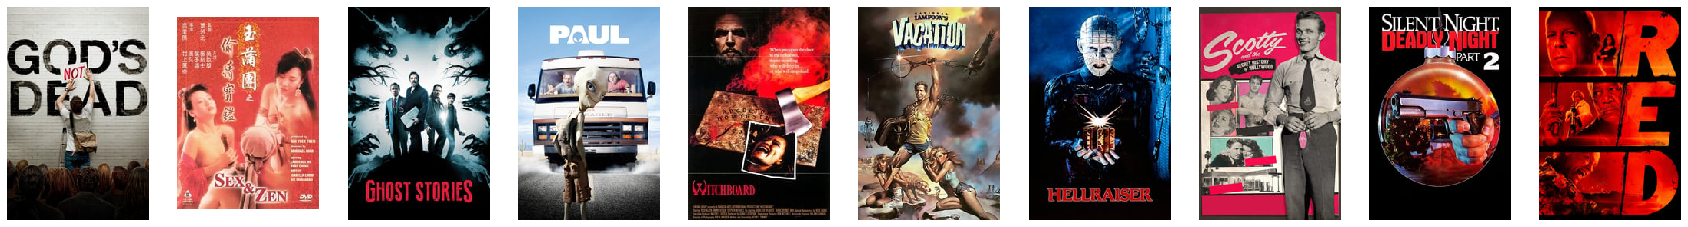

In [5]:
# Get image POC:

from imageio import imread
import matplotlib.pyplot as plt

base_url = r"http://image.tmdb.org/t/p/w185"
cnt = 10

f, axarr = plt.subplots(1, cnt)
f.set_figwidth(30)
for poster in train_raw.poster_path:
    image = imread(base_url+poster)
    axarr[cnt-1].axis('off')
    axarr[cnt-1].imshow(image)
    if cnt == 0:
        break
    cnt -= 1



In [6]:
BASE_URL = r"http://image.tmdb.org/t/p/w185"


def get_poster(poster_path):
    image = imread(BASE_URL+"/2N9lhZg6VtVJoGCZDjXVC3a81Ea.jpg")
    hsv_img = rgb_to_hsv(image)
    return hsv_img

In [44]:

removed_columns = ['backdrop_path', 'homepage', 'id', 'poster_path', 'revenue']
train = train_raw[[col for col in train_raw.columns if col not in removed_columns]].copy()

# poster_df = train_raw.poster_path.apply(get_poster) # Takes long time - uncomment only when needed
Y = train_raw[['revenue']].copy()

train['belongs_to_collection'] = train_raw['belongs_to_collection'].apply(lambda x: None if pd.isna(x) else eval(x))
# COLLECTION_DICT = {v['id']:v['name'] for v in train['belongs_to_collection'] if not pd.isna(v)}
# train['belongs_to_collection'] = train.belongs_to_collection.apply(lambda x: None if pd.isna(x) else x['name'])


# train['genres'] = train.genres.apply(eval)
# GENRES_DICT = {v['id']:v['name'] for v in train.genres.sum()}
train['genres'] = train.genres.apply(lambda gs: tuple(g['name'] for g in eval(gs)))

train['production_companies'] = train.production_companies.apply(eval)

train['production_companies.id'] = train.production_companies\
                                        .apply(lambda companies: tuple(company['id'] for company in companies))

train['production_companies.name'] = train.production_companies\
                                        .apply(lambda companies: tuple(company['name'] for company in companies))

train['production_companies.origin_country'] = train.production_companies\
                                        .apply(lambda companies: tuple(company['origin_country'] for company in companies))

# train['production_companies'] = train.production_companies\
#                                         .apply(lambda companies: tuple(company['name'] for company in eval(companies)))

# train['production_countries'] = train.production_countries.apply(eval)
train['production_countries'] = train.production_countries.apply(lambda countries: tuple(country['iso_3166_1'] for country in eval(countries)))

train['release_date'] = train.release_date.apply(datetime.fromisoformat)

# train['spoken_languages'] = train.spoken_languages.apply(eval)
train['spoken_languages'] = train.spoken_languages.apply(lambda langs: tuple(lang['iso_639_1'] for lang in eval(langs)))


train['Keywords'] = train.Keywords.apply(eval)
KEYWORDS_DICT = {v['id']:v['name'] for v in train.Keywords.sum()}
train['Keywords'] =train.Keywords.apply(lambda keywords: tuple(kw['id'] for kw in keywords)) # TODO: Maybe keep words?

train['cast'] = train.cast.apply(eval)
train['cast.id'] = train.cast.apply(lambda actors: tuple(actor['id'] for actor in actors))
train['cast.gender'] = train.cast.apply(lambda actors: tuple(actor['gender'] for actor in actors)) # Gender ratio

# train['cast'] = train.cast.apply(lambda actors: tuple(actor['name'] for actor in eval(actors))) # TODO: What should we do with cast details??

train['crew'] = train.crew.apply(eval)
train['crew.id'] = train.crew.apply(lambda crew: tuple(member['id'] for member in crew))
train['crew.gender'] = train.crew.apply(lambda crew: tuple(member['gender'] for member in crew)) # Gender ratio
train['crew.department'] = train.crew.apply(lambda crew: tuple(member['department'] for member in crew)) # Dept size
# train['crew'] = train.crew.apply(lambda crew: tuple(member['name'] for member in eval(crew))) # TODO: What should we do with crew details??

# TODO: 'status' column is 'Released' only..
# TODO: 'video' column is False only (almost)..
# TODO: Keep only one of 'title' and 'original_title', with boolean if changed? (no - different languages)
# TODO: Should we treat release months only? seasons? (Binning)
# TODO: Should we bin runtime? budget?
# TODO: What to do with overview??? drop? summarize? label?
# TODO: tagline??? drop? label? sentiment-analysis? 
# TODO: Dummy var: production_companies, genres, production_countries, spoken_languages, ??keywords?? , ??cast??, ??crew??

In [45]:
train

,belongs_to_collection,budget,genres,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,Keywords,cast,crew,production_companies.id,production_companies.name,production_companies.origin_country,cast.id,cast.gender,crew.id,crew.gender,crew.department
0,"{'id': 556, 'name': 'Spider-Man Collection', '...",258000000,"(Fantasy, Action, Adventure)",tt0413300,en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,22.024,"[{'id': 19551, 'logo_path': '/2WpWp9b108hizjHK...","(US,)",2007-05-01,139.0,"(en, fr)",Released,The battle within.,Spider-Man 3,False,6.2,8180,"(697, 851, 1453, 1965, 2038, 3446, 3986, 4391,...","[{'cast_id': 30, 'character': 'Peter Parker / ...","[{'credit_id': '52fe4252c3a36847f80151a5', 'de...","(19551, 5, 326, 34)","(Marvel Enterprises, Columbia Pictures, Laura ...","(US, US, , US)","(2219, 205, 17051, 19159, 17052, 18997, 18998,...","(2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, ...","(6410, 10570, 7623, 7623, 7624, 7624, 7625, 77...","(1, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, ...","(Production, Production, Writing, Directing, W..."
1,"{'id': 256296, 'name': 'Silent Night, Deadly N...",250000,"(Comedy, Horror)",tt0093974,en,"Silent Night, Deadly Night Part 2",After being traumatized by his brother Billy's...,4.756,"[{'id': 18924, 'logo_path': None, 'name': 'Sil...","(US,)",1987-04-10,88.0,"(en,)",Released,The nightmare is about to begin ... AGAIN!,"Silent Night, Deadly Night Part 2",False,4.3,68,"(65, 1991, 9663, 9826, 10714, 11181, 157758, 1...","[{'cast_id': 1000, 'character': 'Ricky Caldwel...","[{'credit_id': '52fe47d4c3a36847f814a70f', 'de...","(18924,)","(Silent Night Releasing Corporation,)","(,)","(151123, 151124, 98078, 560010, 101281, 560011...","(2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, ...","(71031, 91309, 97711, 110718, 213404, 213404, ...","(2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)","(Sound, Crew, Writing, Camera, Writing, Direct..."
2,None,0,"(Documentary,)",tt2773246,en,Scotty and the Secret History of Hollywood,A deliciously scandalous portrait of unsung Ho...,4.746,"[{'id': 88564, 'logo_path': '/pn3p12IC4Tb0K8re...","(US,)",2018-07-27,98.0,"(en,)",Released,NaN,Scotty and the Secret History of Hollywood,False,6.5,15,"(158718,)","[{'cast_id': 1, 'character': 'Himself', 'credi...","[{'credit_id': '5980e931c3a3680cfb002d0e', 'de...","(88564,)","(Water's End Productions,)","(US,)","(1862182, 71766, 1862185, 1862186, 11275, 1453...","(2, 2, 0, 0, 2, 2, 1)","(27710, 74761, 143067, 222365, 939501, 1046137...","(0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, ...","(Production, Sound, Editing, Sound, Crew, Prod..."
3,"{'id': 8917, 'name': 'Hellraiser Collection', ...",1000000,"(Horror,)",tt0093177,en,Hellraiser,An unfaithful wife encounters the zombie of he...,13.828,"[{'id': 1950, 'logo_path': None, 'name': 'New ...","(GB,)",1987-09-11,94.0,"(en,)",Released,He'll tear your soul apart.,Hellraiser,False,6.9,1115,"(1449, 3182, 6152, 9748, 10327, 10864, 15001, ...","[{'cast_id': 15, 'character': 'Larry Cotton', ...","[{'credit_id': '533fd9260e0a262b92001027', 'de...","(1950, 15338, 15339, 15340)","(New World Pictures, Cinemarque Entertainment ...","(, , , )","(14782, 45588, 56551, 56552, 24737, 56553, 565...","(2, 1, 1, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, ...","(498, 19155, 19155, 9000, 10121, 10121, 40765,...","(1, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, ...","(Costume & Make-Up, Sound, Sound, Production, ..."
4,"{'id': 108693, 'name': 'National Lampoon's Vac...",15000000,"(Comedy, Adventure)",tt0085995,en,National Lampoon's Vacation,Clark Griswold is on a quest to take his famil...,15.070,"[{'id': 174, 'logo_path': '/IuAlhI9eVC9Z8UQWOI...","(US,)",1983-07-28,99.0,"(en,)",Released,Every summer Chevy Chase takes his family on a...,National Lampoon's Vacation,False,7.1,782,"(5493, 7312, 10673, 14724, 33694, 158340, 179431)","[{'cast_id': 1, 'charac

In [10]:
# TODO: Dummy var: production_companies, genres, production_countries, spoken_languages, ??keywords?? , ??cast??, ??crew??
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

In [11]:
dummy_genres = pd.DataFrame(mlb.fit_transform(train.genres),
                            columns=['genre_'+cl for cl in mlb.classes_], 
                            index=train.index)

In [12]:
dummy_companies = pd.DataFrame(mlb.fit_transform(train.production_companies),
                                columns=['company_'+cl for cl in mlb.classes_], 
                                index=train.index)

In [13]:
dummy_countries =pd.DataFrame(mlb.fit_transform(train.production_countries),
                                columns=['country_'+cl for cl in mlb.classes_], 
                                index=train.index)

In [14]:
dummy_lang = pd.DataFrame(mlb.fit_transform(train.spoken_languages),
                            columns=['lang_'+cl for cl in mlb.classes_], 
                            index=train.index)


In [15]:
dummy_keywords = pd.DataFrame(mlb.fit_transform(train.Keywords),
                                columns=['kw_'+cl for cl in mlb.classes_], 
                                index=train.index)

In [16]:
dummy_cast = pd.DataFrame(mlb.fit_transform(train.cast),
                                columns=['cast_'+cl for cl in mlb.classes_], 
                                index=train.index)

In [17]:
dummy_crew = pd.DataFrame(mlb.fit_transform(train.crew),
                                columns=['crew_'+cl for cl in mlb.classes_], 
                                index=train.index)

In [18]:
dummy_countries

,country_AE,country_AF,country_AR,country_AT,country_AU,country_BA,country_BE,country_BG,country_BR,country_BS,country_CA,country_CH,country_CL,country_CN,country_CO,country_CS,country_CZ,country_DE,country_DK,country_DZ,country_EG,country_ES,country_ET,country_FI,country_FJ,country_FR,country_GB,country_GE,country_GH,country_GR,country_HK,country_HR,country_HU,country_ID,country_IE,country_IL,country_IN,country_IR,country_IS,country_IT,country_JO,country_JP,country_KE,country_KH,country_KR,country_LB,country_LI,country_LT,country_LU,country_LY,country_MA,country_MC,country_MR,country_MT,country_MX,country_MY,country_NL,country_NO,country_NZ,country_PE,country_PH,country_PK,country_PL,country_PR,country_QA,country_RO,country_RS,country_RU,country_RW,country_SA,country_SE,country_SG,country_SI,country_SU,country_TH,country_TN,country_TR,country_TW,country_TZ,country_UA,country_US,country_UY,country_VE,country_VN,country_XC,country_ZA
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5210,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5211,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5212,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5213,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
